<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Análise dos Dados do Airbnb - Amsterdam

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Amsterdam, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-06-05/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [90]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,23726706,Private room 20 minutes from Amsterdam + Break...,122619127,Patricia,NaN,IJburg - Zeeburgereiland,52.34916,4.97879,Private room,88,2,78,2022-05-29,1.53,1,66,11,038469D9AA6BDF1142CE
1,35815036,"Vrijstaand vakantiehuis, privé tuin aan het water",269425139,Lydia,NaN,Noord-Oost,52.42419,4.95689,Entire home/apt,105,3,95,2022-06-02,2.65,1,243,36,NaN
2,31553121,Quiet Guesthouse near Amsterdam,76806621,Ralf,NaN,Noord-West,52.43237,4.91821,Entire home/apt,152,2,82,2022-05-29,2.02,1,3,26,NaN
3,34745823,"Apartment ' Landzicht', nearby Amsterdam",238083700,Daisy,NaN,Gaasperdam - Driemond,52.29620,5.01231,Entire home/apt,87,2,39,2022-04-17,1.08,3,290,4,NaN
4,44586947,"Weesp, 2 kamers vlakbij Amsterdam",360838688,Aranka,NaN,Gaasperdam - Driemond,52.31475,5.03030,Private room,160,2,15,2022-05-29,0.68,1,152,12,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos de entradas do dataset

display(df.dtypes)


Entradas:	 6173
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.095578
last_review                       0.095578
license                           0.067228
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

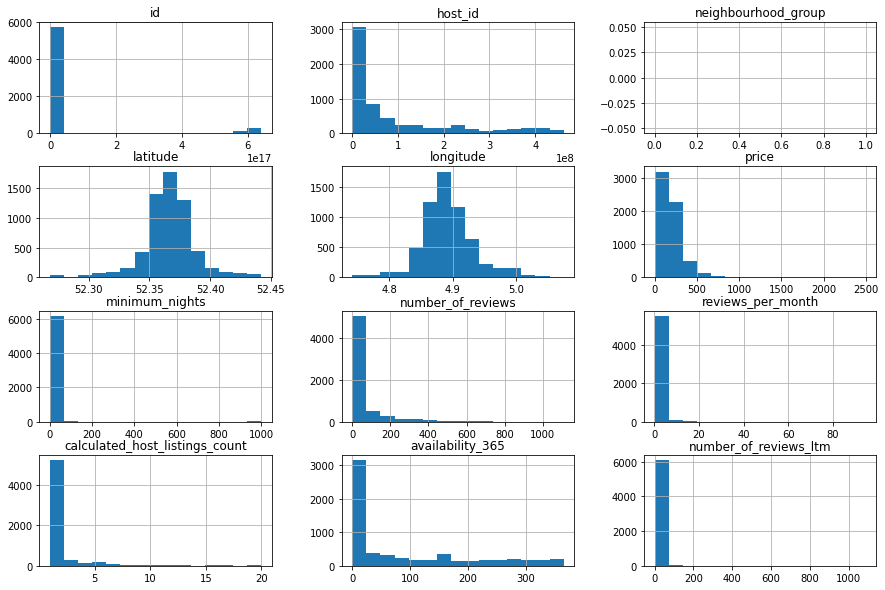

In [ ]:
# plotar o histograma das variáveis numéricas

#Falar um pouco sobre outliers

df.hist(bins=15, figsize=(15,10));

**3.1 Outliers**



Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

Resumo estatístico por meio do método describe()
Plotar boxplots para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6173.000000,6173.000000,6173.000000,5583.000000,6173.000000,6173.000000
mean,198.019601,4.497813,50.760408,1.211241,2.043253,87.994168
std,140.546979,31.221594,94.366924,2.249919,2.833791,112.572382
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,115.000000,2.000000,4.000000,0.260000,1.000000,0.000000
50%,160.000000,2.000000,17.000000,0.570000,1.000000,23.000000
75%,240.000000,3.000000,48.000000,1.430000,2.000000,158.000000
max,2500.000000,1001.000000,1110.000000,94.880000,20.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

A variável price possui 75% do valor abaixo de 240, porém seu valor máximo é 2500.
A quantidade mínima de noites (minimum_nights) está acima do limite real de 365 dias no ano.

## **3.1.1 Boxplot para minimum_nights**

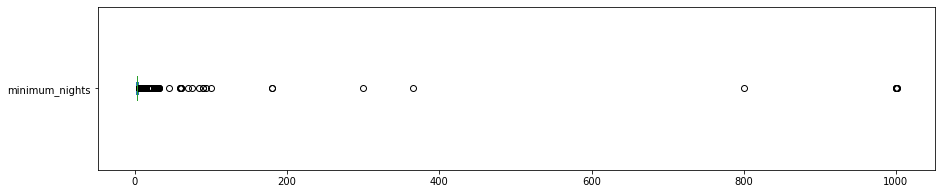

minimum_nights: valores acima de 30:
26 entradas
0.4212%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

# **3.1.2 Boxplot para price**

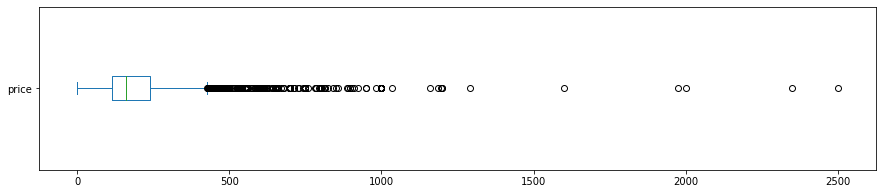


price: valores acima de 1000
12 entradas
0.1944%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# **3.1.3 Histogramas sem outliers**

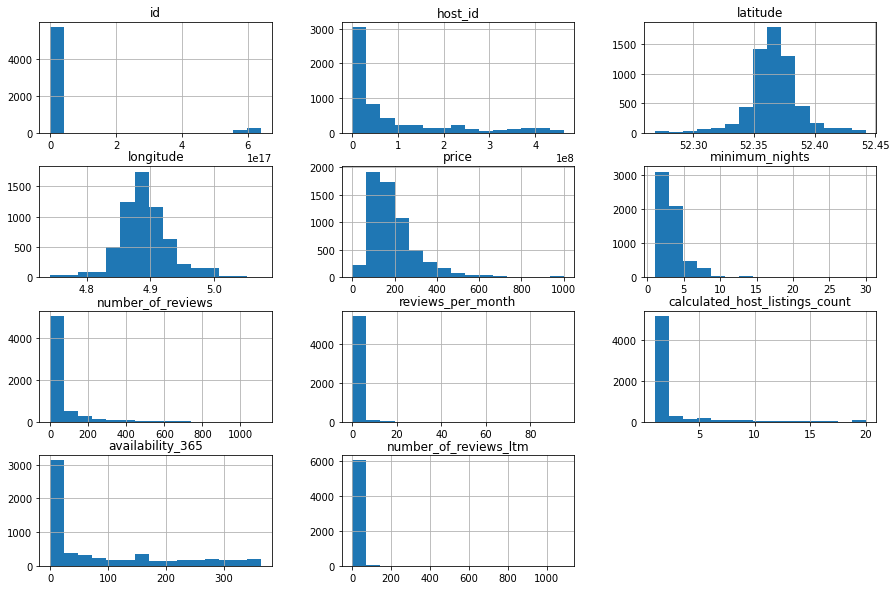

In [66]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [14]:
# ver a média da coluna `price``
# ver o resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6135.000000,6135.000000,6135.000000,5553.000000,6135.000000,6135.000000
mean,195.464059,3.236675,50.817278,1.213294,2.044988,87.416137
std,125.253165,3.363151,94.470909,2.254767,2.840436,112.216955
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,115.000000,2.000000,4.000000,0.260000,1.000000,0.000000
50%,160.000000,2.000000,17.000000,0.570000,1.000000,22.000000
75%,240.000000,3.000000,49.000000,1.430000,2.000000,157.000000
max,1000.000000,30.000000,1110.000000,94.880000,20.000000,365.000000


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032140,-0.170382,-0.076100,0.071969,0.191141
minimum_nights,-0.032140,1.000000,-0.133245,-0.146603,-0.098770,-0.061738
number_of_reviews,-0.170382,-0.133245,1.000000,0.647442,-0.004317,0.203263
reviews_per_month,-0.076100,-0.146603,0.647442,1.000000,0.101964,0.268506
calculated_host_listings_count,0.071969,-0.098770,-0.004317,0.101964,1.000000,0.360078
availability_365,0.191141,-0.061738,0.203263,0.268506,0.360078,1.000000


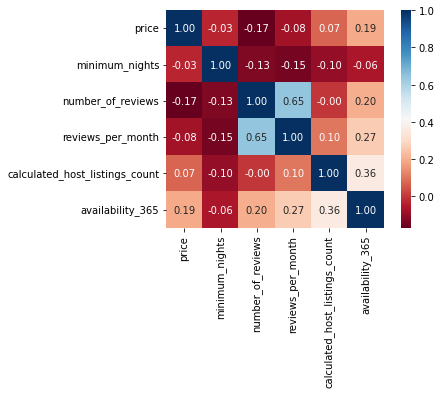

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4199
Private room       1833
Hotel room           78
Shared room          32
Name: room_type, dtype: int64

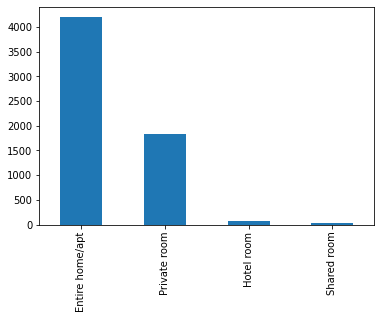

In [16]:
df_clean.room_type.value_counts().plot(x="Tipo", y="Quantidade", kind="bar")
plt.show()

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.683619
Private room       0.298452
Hotel room         0.012714
Shared room        0.005216
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [34]:
# ver preços por bairros, na média
precos_por_bairro = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]
print(precos_por_bairro)

neighbourhood
Centrum-Oost                232.761269
Centrum-West                225.645783
De Pijp - Rivierenbuurt     209.416244
Zuid                        208.986595
Oud-Noord                   206.456349
De Baarsjes - Oud-West      196.273341
Westerpark                  195.178313
IJburg - Zeeburgereiland    188.975460
Buitenveldert - Zuidas      184.917355
Geuzenveld - Slotermeer     183.346535
Name: price, dtype: float64


In [57]:
precos_por_bairro_dict = dict(precos_por_bairro)


<BarContainer object of 10 artists>

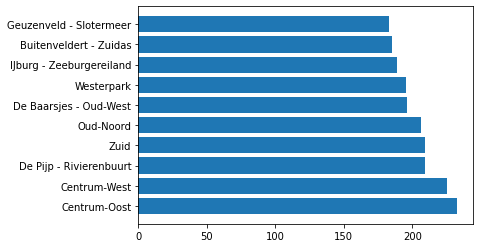

In [62]:
fig, ax = plt.subplots()
ax.barh(list(precos_por_bairro_dict.keys()), list(precos_por_bairro_dict.values()))


In [ ]:
locais = dict(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10])
print(locais)

{'Centrum-Oost': 237.73089700996678, 'Centrum-West': 229.0828331332533, 'Zuid': 211.19786096256684, 'De Pijp - Rivierenbuurt': 209.41624365482232, 'Oud-Noord': 206.45634920634922, 'De Baarsjes - Oud-West': 196.27334083239595, 'Westerpark': 195.17831325301205, 'IJburg - Zeeburgereiland': 188.9754601226994, 'Buitenveldert - Zuidas': 184.91735537190084, 'Geuzenveld - Slotermeer': 183.34653465346534}


In [ ]:
locais.keys()

dict_keys(['Centrum-Oost', 'Centrum-West', 'Zuid', 'De Pijp - Rivierenbuurt', 'Oud-Noord', 'De Baarsjes - Oud-West', 'Westerpark', 'IJburg - Zeeburgereiland', 'Buitenveldert - Zuidas', 'Geuzenveld - Slotermeer'])

In [ ]:
for local in locais.keys():
  print(df_clean[df_clean.neighbourhood == local].shape)
  df_clean[df_clean.neighbourhood == local].value_counts()



(602, 17)
(833, 17)
(374, 17)
(591, 17)
(252, 17)
(889, 17)
(415, 17)
(163, 17)
(121, 17)
(101, 17)


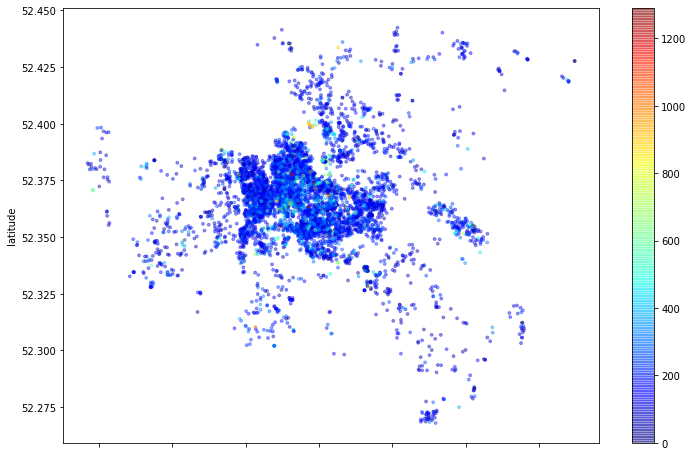

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual a localidade mais barata do dataset?**

In [63]:
# ver preços por bairros, na média
precos_por_bairro = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[10:]
print(precos_por_bairro)

neighbourhood
Oud-Oost                                  183.089506
Watergraafsmeer                           179.267857
De Aker - Nieuw Sloten                    174.333333
Bos en Lommer                             162.217899
Oostelijk Havengebied - Indische Buurt    161.252427
Osdorp                                    158.666667
Noord-West                                155.224852
Noord-Oost                                146.240223
Bijlmer-Centrum                           142.573171
Slotervaart                               139.466019
Bijlmer-Oost                              131.137931
Gaasperdam - Driemond                     121.986667
Name: price, dtype: float64


<BarContainer object of 12 artists>

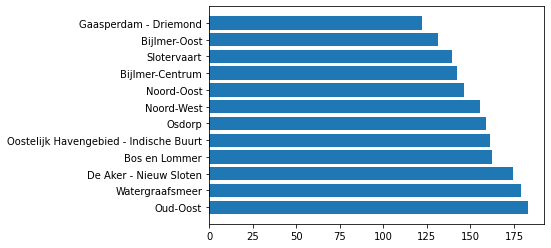

In [64]:
precos_por_bairro_dict = dict(precos_por_bairro)

fig, ax = plt.subplots()
ax.barh(list(precos_por_bairro_dict.keys()), list(precos_por_bairro_dict.values()))

### **Qual a estadia mais barata em Centrum Oost?**

In [ ]:
df_clean.head()

In [ ]:


df_clean[df_clean['neighbourhood'] == 'Centrum-Oost'].sort_values(by="price")[3:13]


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

df_clean[['minimum_nights']].describe()

,minimum_nights
count,6142.000000
mean,3.237708
std,3.369426
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,30.000000


## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.